# hw_13

为某个网站的用户购买行为信息,构造合适的分类模型，预测用户最终的购买服务类型.
以下数据，第1列为来源网站，第2列为用户所在地区，第3列为是否阅读过FAQ，第4列为浏览网页数，第5列为购买的服务类型（目标变量）,

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import os

my_data=[['slashdot','USA','yes',18,'None'],
         ['google','France','yes',23,'Premium'],
         ['digg','USA','yes',24,'Basic'],
         ['kiwitobes','France','yes',23,'Basic'],
         ['google','UK','no',21,'Premium'],
         ['(direct)','New Zealand','no',12,'None'],
         ['(direct)','UK','no',21,'Basic'],
         ['google','USA','no',24,'Premium'],
         ['slashdot','France','yes',19,'None'],
         ['digg','USA','no',18,'None'],
         ['google','UK','no',18,'None'],
         ['kiwitobes','UK','no',19,'None'],
         ['digg','New Zealand','yes',12,'Basic'],
         ['slashdot','UK','no',21,'None'],
         ['google','UK','yes',18,'Basic'],
         ['kiwitobes','France','yes',19,'Basic']]

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.DataFrame(my_data)
data.columns= ["website","area",
                      "read FAQ?","Page Views","Buying Type"]
data.head()

,website,area,read FAQ?,Page Views,Buying Type
0,slashdot,USA,yes,18,None
1,google,France,yes,23,Premium
2,digg,USA,yes,24,Basic
3,kiwitobes,France,yes,23,Basic
4,google,UK,no,21,Premium


In [4]:

# 数据是类别标签，要将它转换为数据
# website, 按照有无浏览网站分为2类
data.replace('(direct)',-1, inplace=True)
data.replace(['slashdot','google','digg','kiwitobes'],-1, inplace=True)

# area，按照欧洲，美洲进行划分
data.replace(['France','New Zealand','UK'],-1, inplace=True)
data.replace(['USA'],1, inplace=True)


# READ FAQ?
data.replace(['yes'],1, inplace=True)
data.replace(['no'],-1, inplace=True)

# Page Views, 20次作为分水岭
data.loc[data.iloc[:,3] >= 20,'Page Views'] = 1
data.loc[data.iloc[:,3] < 20,'Page Views'] = -1

# Buying Type，按照买或者没买划分
data.loc[data.iloc[:,4] != 'None','Buying Type'] = 1
data.loc[data.iloc[:,4] == 'None','Buying Type'] = -1

x = data.iloc[:,:4].as_matrix().astype(int)
y = data.iloc[:,4].as_matrix().astype(int)
data.head()

,website,area,read FAQ?,Page Views,Buying Type
0,-1,1,1,-1,-1
1,-1,-1,1,-1,1
2,-1,1,1,-1,1
3,-1,-1,1,-1,1
4,-1,-1,-1,-1,1


In [28]:
#拆分训练数据与测试数据 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [29]:
#训练KNN分类器 
knl = KNeighborsClassifier(algorithm='kd_tree')
knl.fit(x_train, y_train)

#测试结果
answer = knl.predict(x_test)

print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

#准确率
precision, recall, thresholds = precision_recall_curve(y_train, knl.predict(x_train))
print("classification_report: \n",classification_report(y_test, answer, target_names = ['不买', '买']))

np.mean( answer == y_test): 
 1.0 

classification_report: 
              precision    recall  f1-score   support

         不买       1.00      1.00      1.00         2
          买       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4



In [30]:
####贝叶斯分类器####
#训练贝叶斯分类器
bnb = BernoulliNB() 
bnb.fit(x_train,y_train)


#测试结果
answer = bnb.predict(x_test)
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

print("classification_report: \n",classification_report(y_test, answer, target_names = ['不买', '买']))

np.mean( answer == y_test): 
 0.5 

classification_report: 
              precision    recall  f1-score   support

         不买       0.00      0.00      0.00         2
          买       0.50      1.00      0.67         2

avg / total       0.25      0.50      0.33         4



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
####决策树####
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
dtc.fit(x_train, y_train) #训练模型

#导入相关函数，可视化决策树。
#导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
with open("tree.dot", 'w') as f:
  f = export_graphviz(dtc, out_file = f)


#测试结果
answer = dtc.predict(x_test)

# print("x_test: \n",x_test,"\n")
# print("answer: \n",answer,"\n")
# print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")
print("classification_report: \n",classification_report(y_test, answer, target_names = ['不买', '买']))

np.mean( answer == y_test): 
 1.0 

classification_report: 
              precision    recall  f1-score   support

         不买       1.00      1.00      1.00         2
          买       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4



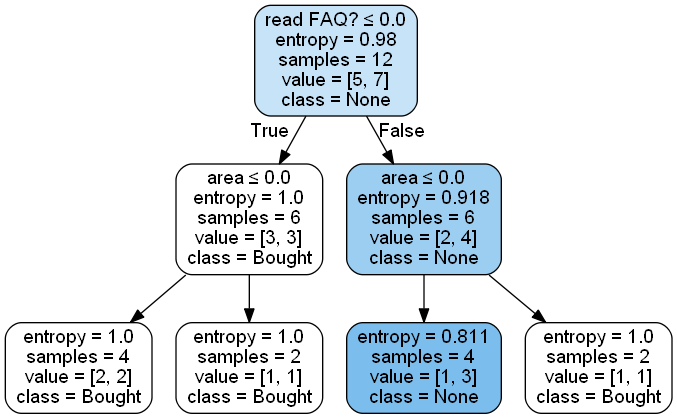

In [32]:
import sklearn.tree as tree
import pydotplus 
from IPython.display import Image

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
#dtc_fit = dtc.fit(x_train, y_train) 

clf= DTC(criterion='entropy')
clf_fit=clf.fit(x_train, y_train) 

dot_data = tree.export_graphviz(clf_fit, 
                                out_file=None,
                                feature_names=["website","area","read FAQ?","Page Views"], 
                                class_names=["Bought","None"], 
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [33]:
####SVM####
from sklearn.svm import SVC
svc =SVC() #线性可分时，使用SVC
svc.fit(x_train, y_train)  

#测试结果
answer = svc.predict(x_test)

# print("x_test: \n",x_test,"\n")
# print("answer: \n",answer,"\n")
# print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

print("classification_report: \n",classification_report(y_test, answer, target_names = ['不买', '买']))

np.mean( answer == y_test): 
 0.5 

classification_report: 
              precision    recall  f1-score   support

         不买       0.00      0.00      0.00         2
          买       0.50      1.00      0.67         2

avg / total       0.25      0.50      0.33         4



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
